**ACTIVIDAD: MOD 5 PREPROCESAMIENTO Y EDA**
* LUIS ENRIQUE HERNÁNDEZ TORRES  A01662166

In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [2]:
def get_data1():

    dataSet = pd.read_csv("pf excel.csv", header=0)
    return dataSet

def get_data2():

    dataSet = pd.read_csv("pf excel2.csv", header=0)
    return dataSet

In [3]:

data1 = get_data1()
data2 = get_data2()
#print(data1)
print(data1.columns.tolist())

['DEPARTAMENTO', ' PRESUPUESTO ', ' GASTO ', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']


1. Se nos proporciono una base de datos de prueba que contiene el departamento, el presupuesto y gasto. 
Primeramente vamos a relaizar el preprocesamiento de los datos, para empezar vamos a transformar las cantidades que tienen formato de cantidades monetarias para poderlo pasar a números decimales 

In [4]:

data1.columns = data1.columns.str.strip()
data1['PRESUPUESTO'] = data1['PRESUPUESTO'].astype(str)
data1['PRESUPUESTO'] = data1['PRESUPUESTO'].str.replace('$', '', regex=False)
data1['PRESUPUESTO'] = data1['PRESUPUESTO'].str.replace('.', '', regex=False)
data1['PRESUPUESTO'] = data1['PRESUPUESTO'].str.replace(',', '', regex=False)
data1['PRESUPUESTO'] = pd.to_numeric(data1['PRESUPUESTO'], errors='coerce')
data1['GASTO'] = data1['GASTO'].astype(str)
data1['GASTO'] = data1['GASTO'].str.replace('$', '', regex=False)
data1['GASTO'] = data1['GASTO'].str.replace('.', '', regex=False)
data1['GASTO'] = data1['GASTO'].str.replace(',', '', regex=False)
data1['GASTO'] = pd.to_numeric(data1['GASTO'], errors='coerce')
data1 = data1[['DEPARTAMENTO', 'PRESUPUESTO', 'GASTO']]

data1


,DEPARTAMENTO,PRESUPUESTO,GASTO
0,Contratación,NaN,NaN
1,Eq. Reparto,6.818178e+07,28654284.0
2,Subtotal,6.818178e+07,28654284.0
3,NaN,NaN,NaN
4,Arte y Diseño,NaN,NaN
5,"Eq, Caracterización",3.309201e+07,12423967.0
6,Eq. Escenografía,8.398380e+07,65793463.0
7,Eq. Música,4.149503e+07,35148428.0
8,Eq. Coreografía,6.804758e+07,23195470.0
9,Vestuario,8.692553e+07,19935644.0


Cambiamos de variables categoricas las unidades especializadas de cada departamento

In [45]:
def pre_process1(data1):

    data1['DEPARTAMENTO'] = [4 if x == 'Eq. Auxiliares' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Eq, Caracterización' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Eq. Música' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Eq. Escenografía' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq Difusión Gráfica' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [4 if x == 'Fotografía' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Vestuario' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [4 if x == 'Distribución' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [5 if x == 'Eq. Guión y adaptación' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Eq. Coreografía' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Efectos Digitales' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Elécricos y maquinistas' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [1 if x == 'Eq. Reparto' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Peinado' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [4 if x == 'Eq. Dirección' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [2 if x == 'Maquillaje' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Iluminación' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [4 if x == 'Eq. Locaciones' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [5 if x == 'Editor' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [6 if x == 'Ensamble y montaje' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [6 if x == 'Eq. Inventario' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Efectos Especiales' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [4 if x == 'Eq. Producción' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Sonido Post' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [6 if x == 'Utilería' else x for x in data1['DEPARTAMENTO']]
    data1['DEPARTAMENTO'] = [3 if x == 'Eq. Sonido Rodaje' else x for x in data1['DEPARTAMENTO']]

    return data1

dataPreprocesada1 = pre_process1(data1)
dataPreprocesada1['EXCEDENTE'] = dataPreprocesada1['PRESUPUESTO'] - dataPreprocesada1['GASTO']
print(dataPreprocesada1)

     DEPARTAMENTO   PRESUPUESTO        GASTO    EXCEDENTE
0    Contratación           NaN          NaN          NaN
1               1  6.818178e+07   28654284.0   39527500.0
2        Subtotal  6.818178e+07   28654284.0   39527500.0
3             NaN           NaN          NaN          NaN
4   Arte y Diseño           NaN          NaN          NaN
5               2  3.309201e+07   12423967.0   20668039.0
6               2  8.398380e+07   65793463.0   18190334.0
7               2  4.149503e+07   35148428.0    6346601.0
8               2  6.804758e+07   23195470.0   44852107.0
9               2  8.692553e+07   19935644.0   66989884.0
10              2  5.428889e+07   31264743.0   23024151.0
11              2  3.178213e+07   10887182.0   20894952.0
12       Subtotal  3.996150e+08  198648897.0  200966068.0
13            NaN           NaN          NaN          NaN
14  Rec. Técnicos           NaN          NaN          NaN
15              3  4.656642e+07   36817356.0    9749062.0
16            

DEPARTAMENTO
1            33141221.0
2           198648897.0
3           173299203.0
4           145015342.0
5           102974761.0
6           132400115.0
Subtotal    785479539.0
Total       785479539.0
Name: GASTO, dtype: float64


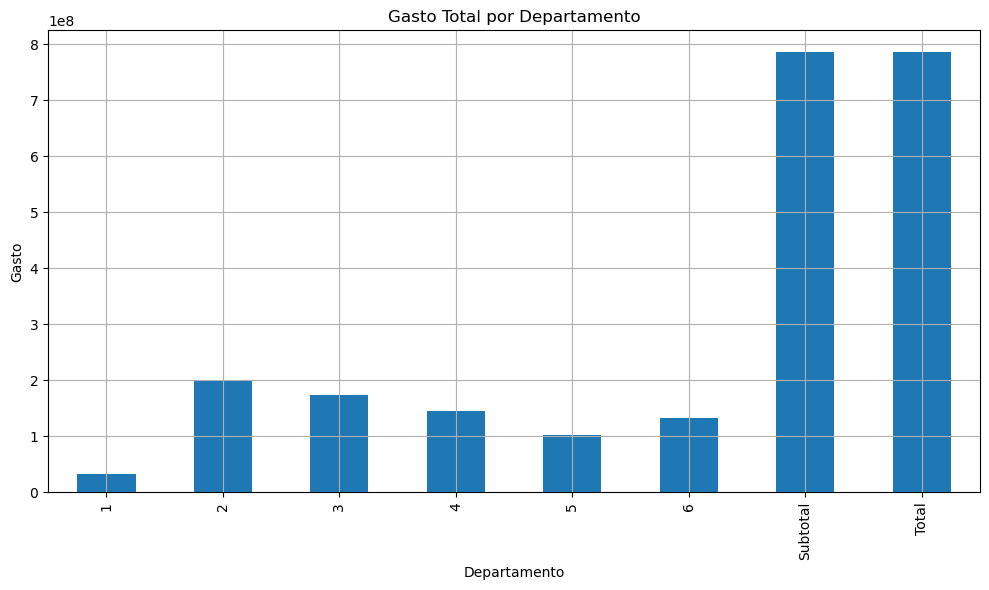

In [ ]:


gasto_por_departamento = df1SinNa.groupby('DEPARTAMENTO')['GASTO'].sum()
print(df1SinNa.groupby('DEPARTAMENTO')['GASTO'].sum())
plt.figure(figsize=(10, 6))
gasto_por_departamento.plot(kind='bar')
plt.title('Gasto Total por Departamento')
plt.ylabel('Gasto')
plt.xlabel('Departamento')
plt.grid()
plt.tight_layout()
plt.show()

DEPARTAMENTO
1            46022529.0
2           200966068.0
3            60734189.0
4           257671045.0
5            21027033.0
6            84646877.0
Subtotal    671067741.0
Total       671067741.0
Name: EXCEDENTE, dtype: float64


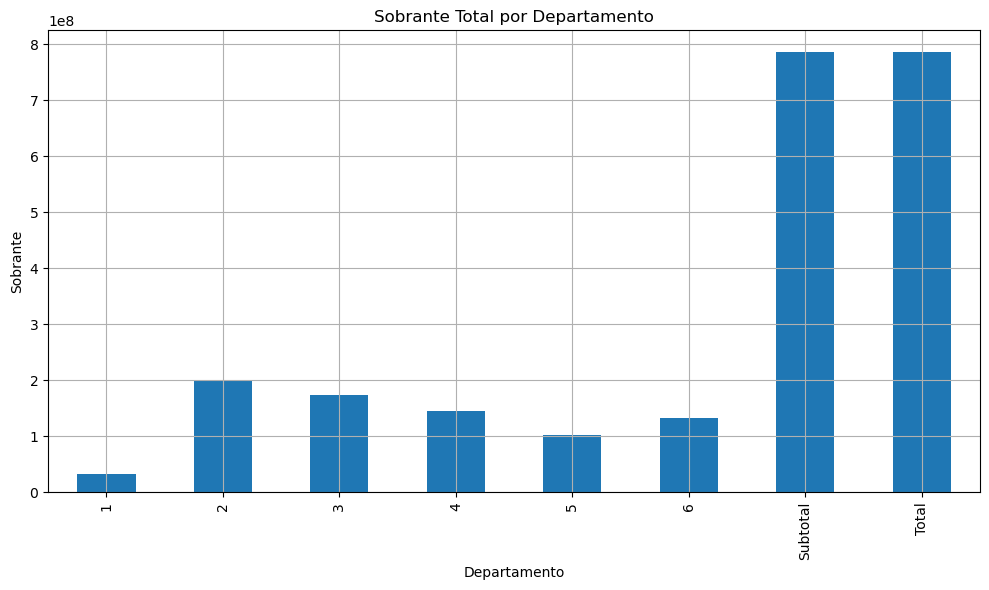

In [59]:

df2sinNa = dataPreprocesada1[dataPreprocesada1['DEPARTAMENTO'].notna() & dataPreprocesada1['EXCEDENTE'].notna()]
print(df2sinNa.groupby('DEPARTAMENTO')['EXCEDENTE'].sum())
sobrante_por_departamento = df2sinNa.groupby('DEPARTAMENTO')['EXCEDENTE'].sum()
plt.figure(figsize=(10, 6))
gasto_por_departamento.plot(kind='bar')
plt.title('Sobrante Total por Departamento')
plt.ylabel('Sobrante')
plt.xlabel('Departamento')
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
data2.columns = data2.columns.str.strip()
data2['GASTO'] = data2['GASTO'].astype(str)
data2['GASTO'] = data2['GASTO'].str.replace('$', '', regex=False)
data2['GASTO'] = data2['GASTO'].str.replace('.', '', regex=False)
data2['GASTO'] = data2['GASTO'].str.replace(',', '', regex=False)
data2['GASTO'] = pd.to_numeric(data2['GASTO'], errors='coerce')
data2 = data2[['FECHA','DEPARTAMENTO', 'UNIDAD ESP.', 'GASTO']]
data2

,FECHA,DEPARTAMENTO,UNIDAD ESP.,GASTO
0,11/11/24,Producción,Eq. Auxiliares,4212534
1,11/11/24,Producción,Eq. Auxiliares,2025257
2,16/11/24,Arte y Diseño,"Eq, Caracterización",6460463
3,16/11/24,Arte y Diseño,Eq. Música,18277183
4,20/11/24,Arte y Diseño,Eq. Escenografía,21711843
...,...,...,...,...
73,04/04/25,Creativo,Eq. Guión y adaptación,11428164
74,09/04/25,Producción,Eq. Auxiliares,1863236
75,12/04/25,Rec. Técnicos,Eq. Sonido Post,22094425
76,14/04/25,Rec. Técnicos,Eq. Iluminación,6417807


In [7]:
unidades_unicas = data2['UNIDAD ESP.'].unique()
print(unidades_unicas)
print(len(unidades_unicas))
print(data1.columns.tolist())

['Eq. Auxiliares' 'Eq, Caracterización' 'Eq. Música' 'Eq. Escenografía'
 'Eq Difusión Gráfica' 'Fotografía' 'Vestuario' 'Distribución'
 'Eq. Guión y adaptación' 'Eq. Coreografía' 'Eq. Efectos Digitales'
 'Eq. Elécricos y maquinistas' 'Eq. Reparto' 'Peinado' 'Eq. Dirección'
 'Maquillaje' 'Eq. Iluminación' 'Eq. Locaciones' 'Editor'
 'Ensamble y montaje' 'Eq. Inventario' 'Eq. Efectos Especiales'
 'Eq. Producción' 'Eq. Sonido Post' 'Utilería' 'Eq. Sonido Rodaje']
26
['DEPARTAMENTO', 'PRESUPUESTO', 'GASTO']


Como ya tenemos la lista de cada uno de los conceptos de cada gasto ahora vamos a realizar un preprocesamiento de datos para el segundo conjunto de datos denotado como 'data2' 

In [29]:
def pre_process(data2):

    data2['UNIDAD ESP.'] = [26 if x == 'Eq. Auxiliares' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [25 if x == 'Eq, Caracterización' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [24 if x == 'Eq. Música' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [23 if x == 'Eq. Escenografía' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [22 if x == 'Eq Difusión Gráfica' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [21 if x == 'Fotografía' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [20 if x == 'Vestuario' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [19 if x == 'Distribución' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [18 if x == 'Eq. Guión y adaptación' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [17 if x == 'Eq. Coreografía' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [16 if x == 'Eq. Efectos Digitales' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [15 if x == 'Eq. Elécricos y maquinistas' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [14 if x == 'Eq. Reparto' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [13 if x == 'Peinado' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [12 if x == 'Eq. Dirección' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [11 if x == 'Maquillaje' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [10 if x == 'Eq. Iluminación' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [9 if x == 'Eq. Locaciones' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [8 if x == 'Editor' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [7 if x == 'Ensamble y montaje' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [6 if x == 'Eq. Inventario' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [5 if x == 'Eq. Efectos Especiales' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [4 if x == 'Eq. Producción' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [3 if x == 'Eq. Sonido Post' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [2 if x == 'Utilería' else x for x in data2['UNIDAD ESP.']]
    data2['UNIDAD ESP.'] = [1 if x == 'Eq. Sonido Rodaje' else x for x in data2['UNIDAD ESP.']]

    data2['DEPARTAMENTO'] = [1 if x == 'Producción' else x for x in data2['DEPARTAMENTO']]
    data2['DEPARTAMENTO'] = [2 if x == 'Arte y Diseño' else x for x in data2['DEPARTAMENTO']]
    data2['DEPARTAMENTO'] = [3 if x == 'Rec. Técnicos' else x for x in data2['DEPARTAMENTO']]
    data2['DEPARTAMENTO'] = [4 if x == 'Creativo' else x for x in data2['DEPARTAMENTO']]
    data2['DEPARTAMENTO'] = [5 if x == 'Contratación' else x for x in data2['DEPARTAMENTO']]
    data2['DEPARTAMENTO'] = [6 if x == 'Logística' else x for x in data2['DEPARTAMENTO']]
    

    return data2

dataPreprocesada = pre_process(data2)
print(dataPreprocesada)

       FECHA  DEPARTAMENTO  UNIDAD ESP.     GASTO
0   11/11/24             1           26   4212534
1   11/11/24             1           26   2025257
2   16/11/24             2           25   6460463
3   16/11/24             2           24  18277183
4   20/11/24             2           23  21711843
..       ...           ...          ...       ...
73  04/04/25             4           18  11428164
74  09/04/25             1           26   1863236
75  12/04/25             3            3  22094425
76  14/04/25             3           10   6417807
77  16/04/25             1           19  13423146

[78 rows x 4 columns]


In [ ]:
def pre_process2(data1)

In [ ]:
dataPreprocesada.info()
#unicosDepartamentos = data2['DEPARTAMENTO'].unique()
#print(unicosDepartamentos)
#print(len(unicosDepartamentos))
#print(data2.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FECHA         78 non-null     object
 1   DEPARTAMENTO  78 non-null     object
 2   UNIDAD ESP.   78 non-null     int64 
 3   GASTO         78 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ KB
['Producción' 'Arte y Diseño' 'Rec. Técnicos' 'Creativo' 'Contratación'
 'Logística']
6
['FECHA', 'DEPARTAMENTO', 'UNIDAD ESP.', 'GASTO']


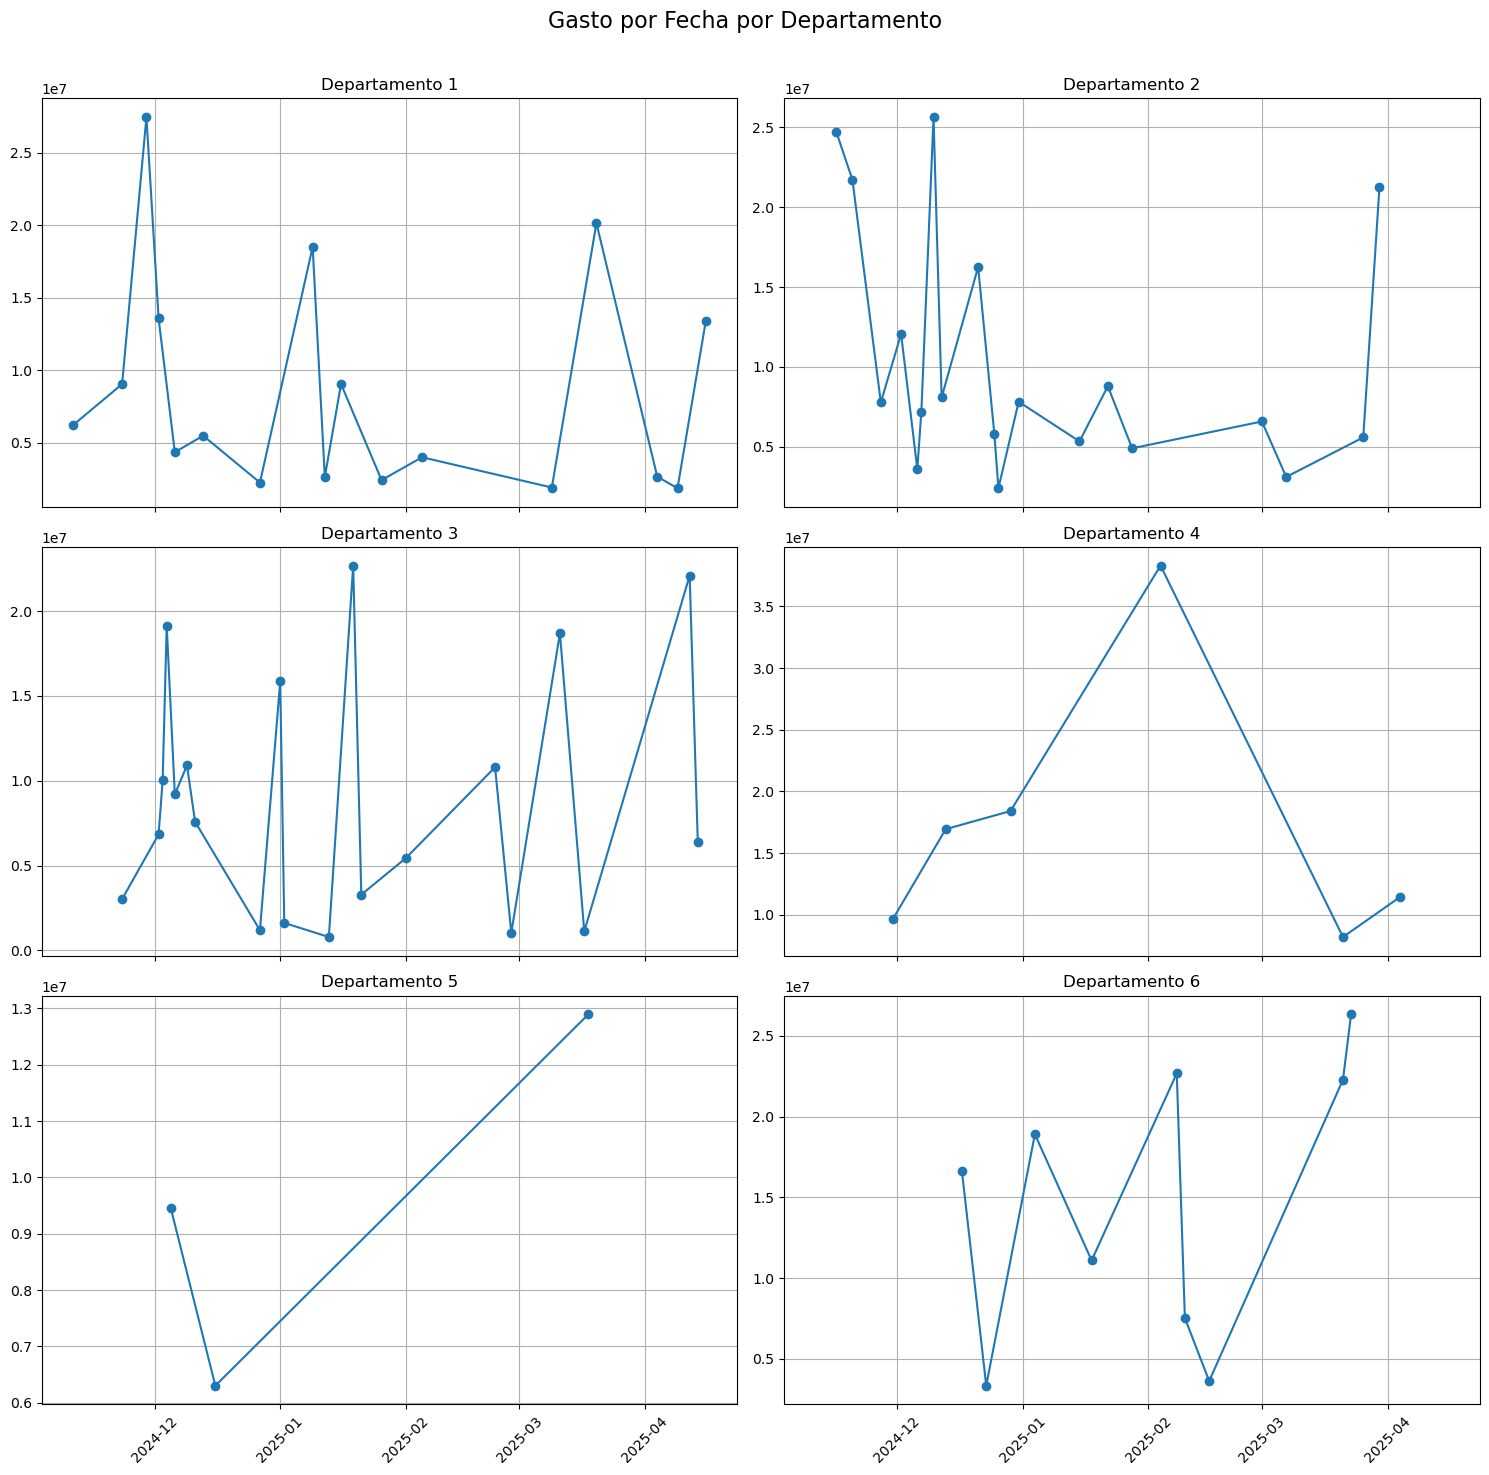

In [ ]:

dataPreprocesada['FECHA'] = pd.to_datetime(dataPreprocesada['FECHA'], format='%d/%m/%y')

df_grouped = dataPreprocesada.groupby(['FECHA', 'DEPARTAMENTO'])['GASTO'].sum().reset_index()

departamentos = sorted(df_grouped['DEPARTAMENTO'].unique())

fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True)
axes = axes.flatten()  

for i, dept in enumerate(departamentos):
    data = df_grouped[df_grouped['DEPARTAMENTO'] == dept]
    axes[i].plot(data['FECHA'], data['GASTO'], marker='o')
    axes[i].set_title(f'Departamento {dept}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Gasto por Fecha por Departamento', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
